In [1]:
import numpy as np 
import pandas as pd 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## EDA

In [2]:
df = pd.read_csv('dataset-churn.csv')
df = df.drop('customerID', axis=1)

In [3]:
missing_values = df.isnull().sum()
print(missing_values)

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [4]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [5]:
# check missing values
def check_missings(df):
    
    missing_val = df.isnull().sum()
    percentage_missing_values = missing_val * 100 / len(df)
    df_missing = pd.concat([missing_val, percentage_missing_values], axis=1)
    df_miss = df_missing.rename(columns = {0:'Number of missing val', 1:'Percentage'})
    df_miss.sort_values(by='Percentage', ascending=False, inplace=True)
    print(df_miss.iloc[[0]])
    
    return df_miss

check_missings(df)

              Number of missing val  Percentage
TotalCharges                     11    0.156183


,Number of missing val,Percentage
TotalCharges,11,0.156183
gender,0,0.000000
SeniorCitizen,0,0.000000
MonthlyCharges,0,0.000000
PaymentMethod,0,0.000000
PaperlessBilling,0,0.000000
Contract,0,0.000000
StreamingMovies,0,0.000000
StreamingTV,0,0.000000
TechSupport,0,0.000000


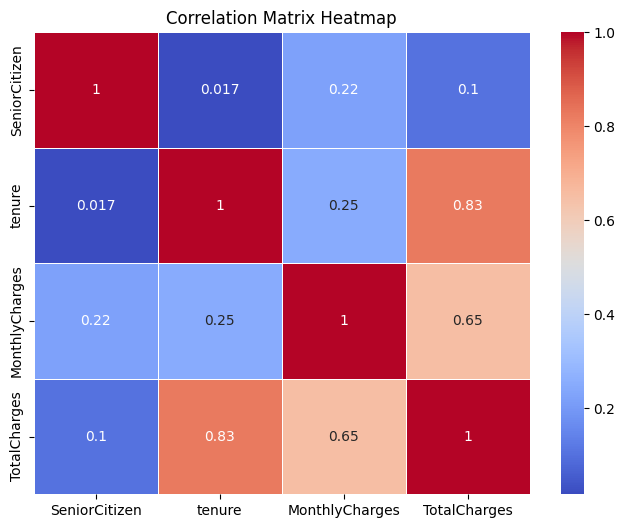

In [6]:
df_floats = df[['SeniorCitizen', 'tenure','MonthlyCharges', 'TotalCharges']]
corr_mat = pd.DataFrame(df_floats).corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [7]:
def fill_missings(**kwargs):
    
    df = kwargs.get('df')
    weights =kwargs.get('weights')
    correlated_features = kwargs.get('correlated_features')
    to_fill = kwargs.get('to_fill')
    weights = weights / np.sum(weights)  # Normalize to sum to 1
    weighted_average = (df[correlated_features] * weights).sum(axis=1)
    df.loc[df[to_fill].isna(), to_fill] = weighted_average[df[to_fill].isna()]
    
    return df
df_floats = df[['SeniorCitizen', 'tenure','MonthlyCharges', 'TotalCharges']]

weights = [0.83, 0.65]
correlated_features = ['MonthlyCharges', 'tenure']
to_fill = 'TotalCharges'
df_complete = fill_missings(df=df_floats, weights=weights, correlated_features=correlated_features,to_fill=to_fill)
df['TotalCharges'] = df_complete['TotalCharges']


In [8]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [9]:

def filter_categorical_numeric_columns(dataframe):
    categorical_columns = dataframe.select_dtypes(include=['object', 'category']).columns
    numeric_columns = dataframe.select_dtypes(include=['number']).columns
    return categorical_columns, numeric_columns


categorical_cols, numeric_cols = filter_categorical_numeric_columns(df)

print("Categorics:")
print(categorical_cols)
print("\nNumerics:")
print(numeric_cols)

Categorics:
Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

Numerics:
Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')


In [10]:
for i in df[categorical_cols]:
    print(f"{i}: {df[i].unique()}")


gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [11]:
replacing_feats = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for i in replacing_feats:
    df[i] = df[i].replace('No internet service', 'No')

In [12]:
df['MultipleLines'] = df['MultipleLines'].replace('No phone service', 'No')
df['Churn'] = df['Churn'].replace({'No': 0, 'Yes': 1})
df['SeniorCitizen'] = df['SeniorCitizen'].astype('object')

In [13]:
df_original = df.copy()

In [125]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


# One-hot encoding for multicategorical features
binary_encoding = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies','gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

df[binary_encoding] = df[binary_encoding].replace({'Yes': 1, 'No': 0, 'Female': 0, 'Male': 1})

In [14]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)  # do'drop='first'' to avoid the dummy variable trap
encoded_columns = encoder.fit_transform(df[['Contract', 'InternetService', 'PaymentMethod']])
encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(['Contract', 'InternetService', 'PaymentMethod']))
encoded_df = encoded_df.astype('object')

# Concatenate the original DataFrame (excluding the original nominal columns) with the encoded DataFrame
df = df.drop(['Contract', 'InternetService', 'PaymentMethod'], axis=1)
df = pd.concat([df, encoded_df], axis=1)

In [15]:
df_original

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,Female,0,Yes,Yes,11,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


visualization

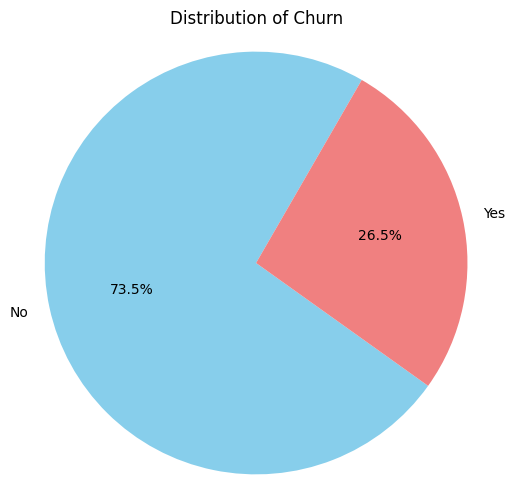

In [16]:

counts = df['Churn'].value_counts() 
labels = ['No', 'Yes']

plt.figure(figsize=(6, 6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], startangle=60)  
plt.title('Distribution of Churn')  
plt.axis('equal')
plt.show()

In [58]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [106]:

def analyze_category(df, category_column, target_column='Churn'):
    """
    Analyzes a categorical column in a DataFrame and visualizes its distribution,
    churn probabilities, and other insights.
    
    Parameters:
    - df: pandas DataFrame containing the data.
    - category_column: The name of the categorical column to analyze.
    - target_column: The name of the target column (default is 'Churn').
    """
    category_counts = df[category_column].value_counts()
    fig = px.pie(names=category_counts.index, values=category_counts.values, 
                 title=f'{category_column} Distribution', color_discrete_sequence=px.colors.qualitative.Pastel)
    fig.update_traces(rotation=50)
    fig.update_layout(width=500, height=400)
    fig.show()

    # Churn Probabilities Calculation
    churn_probabilities = df.groupby(category_column)[target_column].value_counts(normalize=True) * 100
    for category_value in df[category_column].unique():
        # Ensure the calculation accounts for missing 'Yes'/'No' values
        if 1 in churn_probabilities[category_value].index:
            churn_rate = churn_probabilities[category_value][1]
        else:
            churn_rate = 0
        print(f"A {category_value} customer has a probability of {churn_rate:.2f}% churn")

    # Histogram using Plotly
    fig = px.histogram(df, x=category_column, color=target_column, 
                       barmode='group', title=f'{category_column} vs {target_column} Histogram', 
                       width=500, height=400, color_discrete_sequence=px.colors.qualitative.Set2)
    fig.show()
    
    
'''
    # Grouping Data for Seaborn Barplot
    grouped_data = df.groupby([category_column, target_column]).size().reset_index(name='count')

    # Bar Chart using Seaborn
    plt.figure(figsize=(10, 6))
    sns.barplot(data=grouped_data, x=category_column, y='count', hue=target_column, palette='pastel')
    plt.title(f'Number of Customers with or without Churn by {category_column} Type')
    plt.xlabel(category_column)
    plt.ylabel('Count')
    plt.show()
'''

"\n    # Grouping Data for Seaborn Barplot\n    grouped_data = df.groupby([category_column, target_column]).size().reset_index(name='count')\n\n    # Bar Chart using Seaborn\n    plt.figure(figsize=(10, 6))\n    sns.barplot(data=grouped_data, x=category_column, y='count', hue=target_column, palette='pastel')\n    plt.title(f'Number of Customers with or without Churn by {category_column} Type')\n    plt.xlabel(category_column)\n    plt.ylabel('Count')\n    plt.show()\n"

In [126]:
analyze_category(df, 'gender')
#73.07912844036697

A Female customer has a probability of 26.92% churn
A Male customer has a probability of 26.16% churn


In [108]:
analyze_category(df, 'Partner')

A Yes customer has a probability of 19.66% churn
A No customer has a probability of 32.96% churn


In [109]:
analyze_category(df, 'PhoneService')

A No customer has a probability of 24.93% churn
A Yes customer has a probability of 26.71% churn


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7043 non-null   object 
 1   SeniorCitizen                            7043 non-null   object 
 2   Partner                                  7043 non-null   object 
 3   Dependents                               7043 non-null   object 
 4   tenure                                   7043 non-null   int64  
 5   PhoneService                             7043 non-null   object 
 6   MultipleLines                            7043 non-null   object 
 7   OnlineSecurity                           7043 non-null   object 
 8   OnlineBackup                             7043 non-null   object 
 9   DeviceProtection                         7043 non-null   object 
 10  TechSupport                              7043 no

In [111]:
analyze_category(df, 'SeniorCitizen')

A 0 customer has a probability of 23.61% churn
A 1 customer has a probability of 41.68% churn


In [112]:
analyze_category(df, 'MultipleLines')

A No customer has a probability of 25.02% churn
A Yes customer has a probability of 28.61% churn


In [113]:
analyze_category(df, 'OnlineSecurity')

A No customer has a probability of 31.33% churn
A Yes customer has a probability of 14.61% churn


In [114]:
analyze_category(df, 'OnlineBackup')

A Yes customer has a probability of 21.53% churn
A No customer has a probability of 29.17% churn


In [115]:
analyze_category(df, 'DeviceProtection')

A No customer has a probability of 28.65% churn
A Yes customer has a probability of 22.50% churn


In [116]:
analyze_category(df, 'TechSupport')

A No customer has a probability of 31.19% churn
A Yes customer has a probability of 15.17% churn


In [117]:
analyze_category(df, 'StreamingTV')

A No customer has a probability of 24.33% churn
A Yes customer has a probability of 30.07% churn


In [118]:
analyze_category(df, 'StreamingMovies')

A No customer has a probability of 24.38% churn
A Yes customer has a probability of 29.94% churn


In [119]:
analyze_category(df, 'PaperlessBilling')

A Yes customer has a probability of 33.57% churn
A No customer has a probability of 16.33% churn


In [128]:
analyze_category(df_original, 'Contract')

A Month-to-month customer has a probability of 42.71% churn
A One year customer has a probability of 11.27% churn
A Two year customer has a probability of 2.83% churn


In [127]:
analyze_category(df_original, 'PaymentMethod')

A Electronic check customer has a probability of 45.29% churn
A Mailed check customer has a probability of 19.11% churn
A Bank transfer (automatic) customer has a probability of 16.71% churn
A Credit card (automatic) customer has a probability of 15.24% churn


In [129]:
analyze_category(df_original,'InternetService')

A DSL customer has a probability of 18.96% churn
A Fiber optic customer has a probability of 41.89% churn
A No customer has a probability of 7.40% churn


numerical variables

In [142]:

def analyze_category_num(df, numerical_column, target_column='Churn'):

    # Histogram using Plotly
    fig = px.histogram(df, x=numerical_column, color=target_column, 
                       barmode='overlay', marginal='violin', title=f'{numerical_column} vs {target_column} Histogram', 
                       width=500, height=400, color_discrete_sequence=px.colors.qualitative.Set2)
    fig.show()
    

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7043 non-null   object 
 1   SeniorCitizen                            7043 non-null   object 
 2   Partner                                  7043 non-null   object 
 3   Dependents                               7043 non-null   object 
 4   tenure                                   7043 non-null   int64  
 5   PhoneService                             7043 non-null   object 
 6   MultipleLines                            7043 non-null   object 
 7   OnlineSecurity                           7043 non-null   object 
 8   OnlineBackup                             7043 non-null   object 
 9   DeviceProtection                         7043 non-null   object 
 10  TechSupport                              7043 no

In [140]:
analyze_category_num(df,'tenure')

In [145]:
analyze_category_num(df,'TotalCharges')

In [144]:
analyze_category_num(df,'MonthlyCharges')

In [146]:
df.to_csv('/home/juan/Documents/python/Portfolio projects/customer-churn/datasets-curated/dataset.csv')